# Descriptive analysis

In this notebook, we apply **descriptive statistics** to this [dataset](https://salaries.ai-jobs.net/download/) from the website [ai-jobs](https://ai-jobs.net/) in order to properly perform clustering methods.

## Libraries

In [1]:
# Data and numerical operations
import numpy as np
import pandas as pd

# Graph and Charts
from matplotlib import pyplot as plt
import seaborn as sns

# Scripts
import sys
sys.path.insert(0, 'scripts')
import data_wrangling as dw

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Data wrangling

In [3]:
df, scaled_df = dw.read_dataset('dataset.csv')
dw.display_side_by_side(df, scaled_df)

,EN,MI,SE
job_title,,,
AI Scientist,7,3,1
Analytics Engineer,1,7,29
BI Data Analyst,5,6,0
Data Analyst,24,44,111
Data Architect,0,3,34
Data Engineer,18,81,199
Data Science Manager,0,4,21
Data Scientist,36,84,206
ETL Developer,0,2,8


## Descriptive statistics

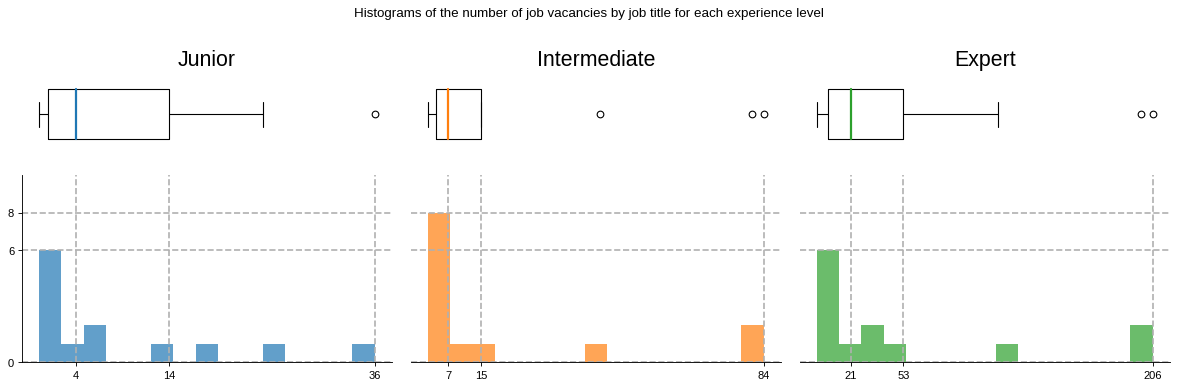

In [17]:
#
# Figure and Axes
#

fig = plt.figure(figsize = (15, 5), dpi = 80)
gs = fig.add_gridspec(nrows = 3, ncols = 3)

plt.suptitle('Histograms of the number of job vacancies by job title for each experience level')

# Box and whiskers plots

ax_box = []
for i in range(3):
    ax_box.append(fig.add_subplot(gs[0, i]))
    
    # Remove spines and ticks and labels
    ax_box[-1].spines[:].set_visible(False)
    ax_box[-1].yaxis.set_visible(False)
    ax_box[-1].xaxis.set_visible(False)

# Histograms

ax_hist = []
for i in range(3):
    ax_hist.append(fig.add_subplot(gs[1:, i]))
    
    # Remove spines and ticks and labels
    if i > 0:
        ax_hist[-1].spines[['top', 'right', 'left']].set_visible(False)
        ax_hist[-1].yaxis.set_tick_params(left = False, labelleft = False)
        #ax_hist[-1].yaxis.set_visible(False)
        
    else:
        ax_hist[-1].spines[['top', 'right']].set_visible(False)
        
#
# Style
#

plt.style.use('seaborn-ticks')
plt.rcParams.update({
    'font.size': 16
})

#
# Box and Whiskers plots
#

titles = ['Junior', 'Intermediate', 'Expert']
for i in range(3):
    ax_box[i].set_title(titles[i])
    
    ax_box[i].boxplot(
        df.iloc[:, i],
        vert = False,
        widths = 0.6,
        medianprops = {
            'color': sns.color_palette()[i],
            'linewidth': 2
        }
    )
    
#
# Histograms
#

hist_stats = []
for i in range(3):
    n, bins, patches = ax_hist[i].hist(
        df.iloc[:, i],
        color = sns.color_palette()[i],
        alpha = 0.7,
        bins = 15
    )
    
    hist_stats.append(n)
    
#
# X and Y labels
#

for i in range(3):
    # Y-axis of the histograms
    ax_hist[i].set_ylim(0, np.max(hist_stats) + 2)
    ax_hist[i].set_yticks([0, np.max(hist_stats[0]), np.max(hist_stats)])
    ax_hist[i].grid(axis = 'both', linestyle = '--', linewidth = 1.5)
    
    # X-axis of the histograms
    ax_box[i].set_xlim(ax_hist[i].get_xlim())
    ax_hist[i].set_xticks([np.median(df.iloc[:,i]), np.quantile(df.iloc[:,i], 0.75), np.max(df.iloc[:, i])])

#
# Show and/or save figure
#

plt.tight_layout()
plt.savefig('images/descriptive-analysis/descriptive_statistics.png', dpi = 100)

In [18]:
df.describe().round(1)

,EN,MI,SE
count,13.0,13.0,13.0
mean,8.6,20.8,52.4
std,11.3,29.5,73.1
min,0.0,2.0,0.0
25%,1.0,4.0,7.0
50%,4.0,7.0,21.0
75%,14.0,15.0,53.0
max,36.0,84.0,206.0


The expert level (SE) is the most sought-after level since its mean, median, and maximum values are the highest of all experience levels, whereas the junior level (EN) is the least sought-after since its mean, median, and maximum values are the lowest. Furthermore, most job titles have few vacancies at all experience levels, whereas some titles are outliers and concentrate the vacancies. We expect that these outliers will cluster apart from the others.

## Scatter plots

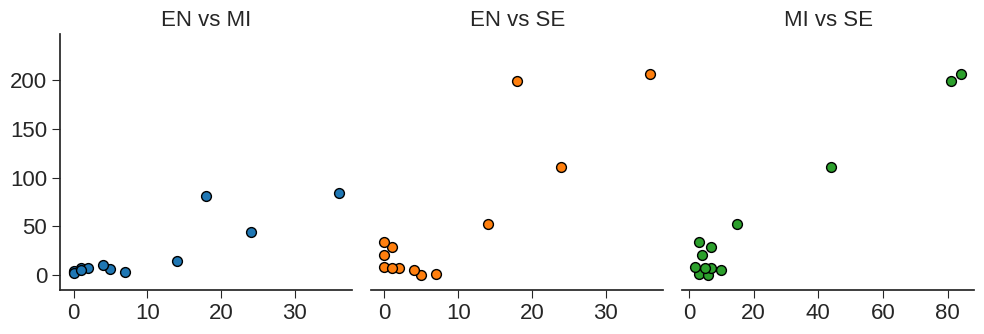

In [19]:
#----- Set figure and Axis -----#

fig = plt.figure(figsize = (10, 3.5), dpi = 100)
gs = fig.add_gridspec(nrows = 1, ncols = 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[0, i]))
    
    # Remove spines
    if i > 0: 
        ax[-1].spines[['top', 'right', 'left']].set_visible(False)
        ax[-1].yaxis.set_visible(False)
        
    else: ax[-1].spines[['top', 'right']].set_visible(False)
        
    ax[-1].set_ylim(-15, df.max().max()*1.2)
        
#----- Style -----#

plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 12})

#----- Scatter plots -----#

titles = ['EN vs MI', 'EN vs SE', 'MI vs SE']
idxs = [(0, 1), (0, 2), (1, 2)]

for i in range(3):
    ax[i].set_title(titles[i], fontsize = 16)
    ax[i].scatter(
        df.iloc[:,idxs[i][0]],
        df.iloc[:,idxs[i][1]],
        color = sns.color_palette()[i],
        s = 50,
        linewidth = 1,
        edgecolor = 'black'
    )

#----- Show and/or save figure -----#

plt.tight_layout()
plt.savefig('images/descriptive-analysis/data_scatter_plots.png', dpi = 100)

From the scatter plots above, we can clearly see that most job titles form a single globular cluster. Furthermore, as previously discussed, there are four outliers that can form different distant clusters.

## Scaling data

Since the amplitudes of each experience level are different, we shall work in the clustering methods with the scaled data (check this [link](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) for more information) to avoid bias at a specific experience level. 

There are many methods for scaling data, such as **robust scaling**, **absolute maximum scaling**, **min-max scaling**, and **standardization** (the Z-score method). Robust scaling is not recommended for our case since we expected effects from outliers. Also, the maximum values of all experience levels are at least 2.6 times greater than the third quartile, which implies that the outliers are far away from the data. As a result, if we use the Min-Max or Absolute Maximum scaling, most values will be very close to zero, effectively negating the effect of most values except outliers. Thus, standardisation looks to be the better data scaling method for this analysis.